importing everything we need.

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import AdaBoostClassifier

# Reading data

reading data from csv file

In [25]:
data = pd.read_csv("UNSW_NB15_training-set.csv")
test_data = pd.read_csv("UNSW_NB15_testing-set.csv")

# Data exploration

using .info() to see if there is a null data (missing data) in the DataFrame. and also to see the type of each column.
>as we can see, there is no missing data ("-" in service means something. probably it means that no service is given).

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

# visualizing the distributions of different featurs to explore some pattern

>visualizing the distribution of train data first three features.

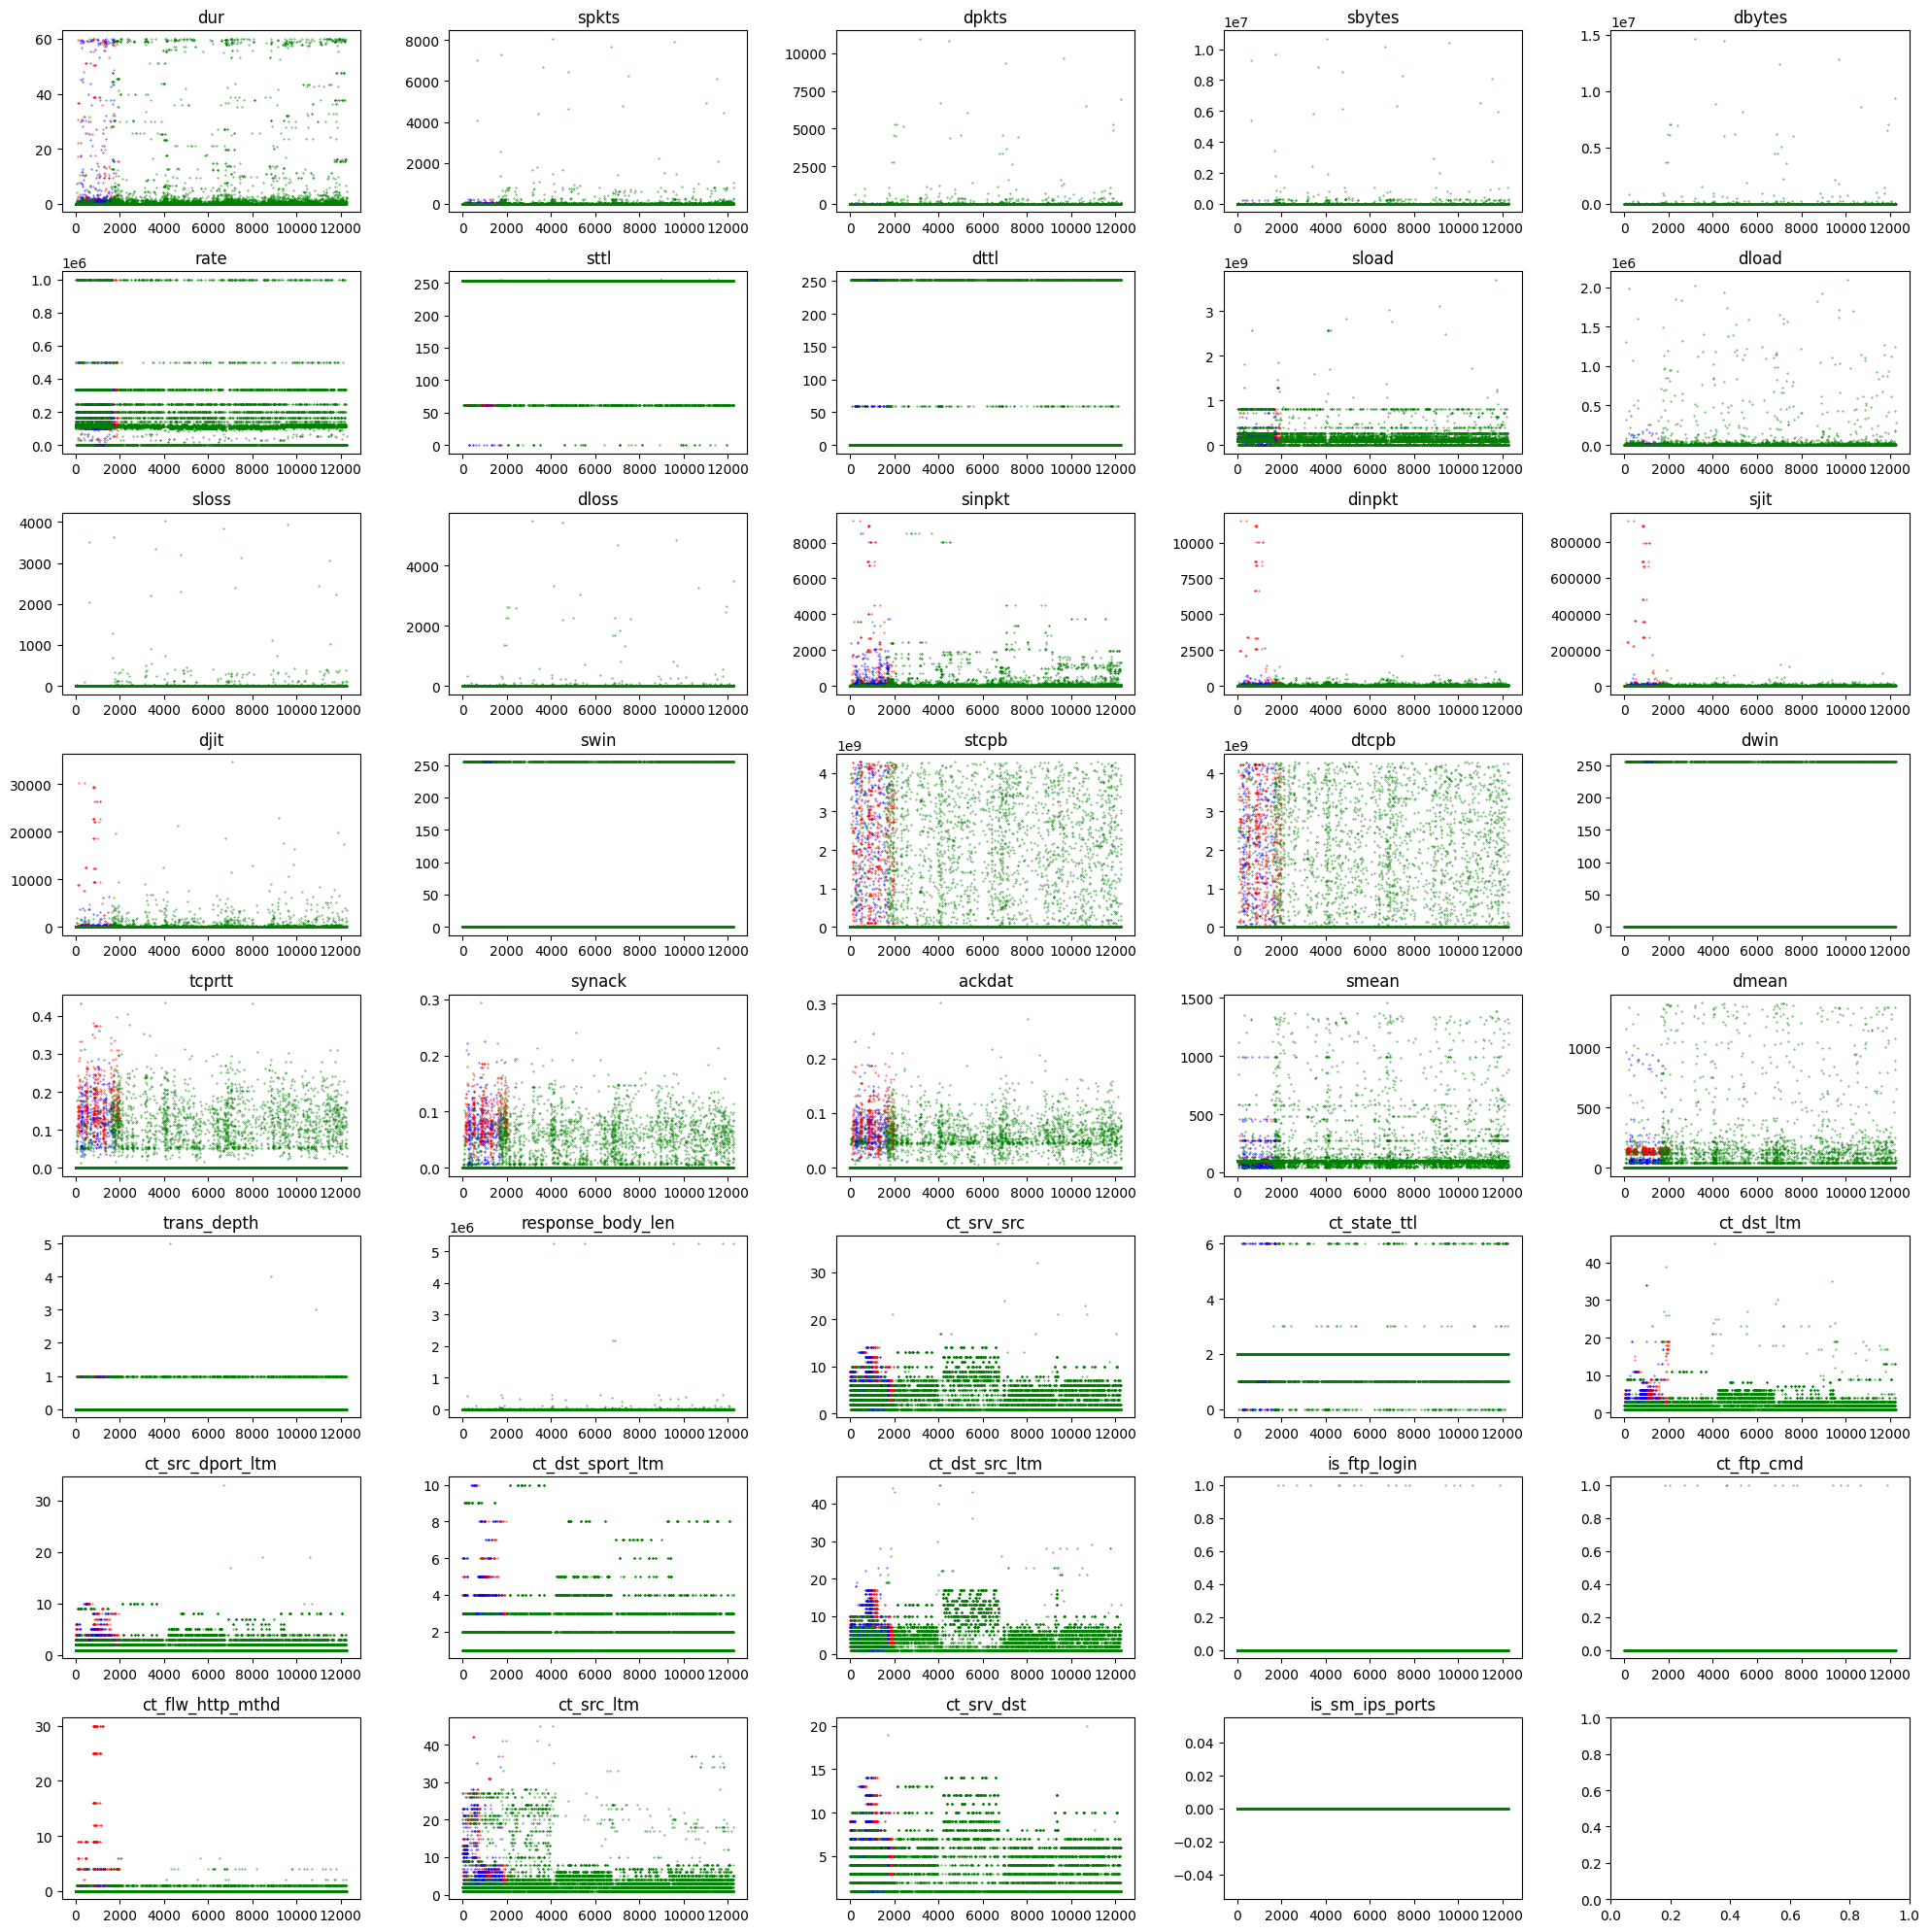

In [9]:
fig, axs = plt.subplots(8, 5, figsize=(20, 20))

axs = axs.flatten()

columns = np.concatenate((np.array([data.columns[1]]), np.array(data.columns[5:-1])))

attack_cat = np.unique(data['attack_cat'])[:3]
colors = ["red", "blue", "green"]

for i, column in enumerate(columns):
    for j in range(len(attack_cat)):
        y = data[data['attack_cat'] == attack_cat[j]][column].values
        axs[i].scatter(np.linspace(0, len(y), len(y)), y, color=colors[j], s=0.1)
    axs[i].set_title(column)
    
plt.tight_layout()

# Display the plot
plt.show()


>visualizing the distribution of train data second three features.

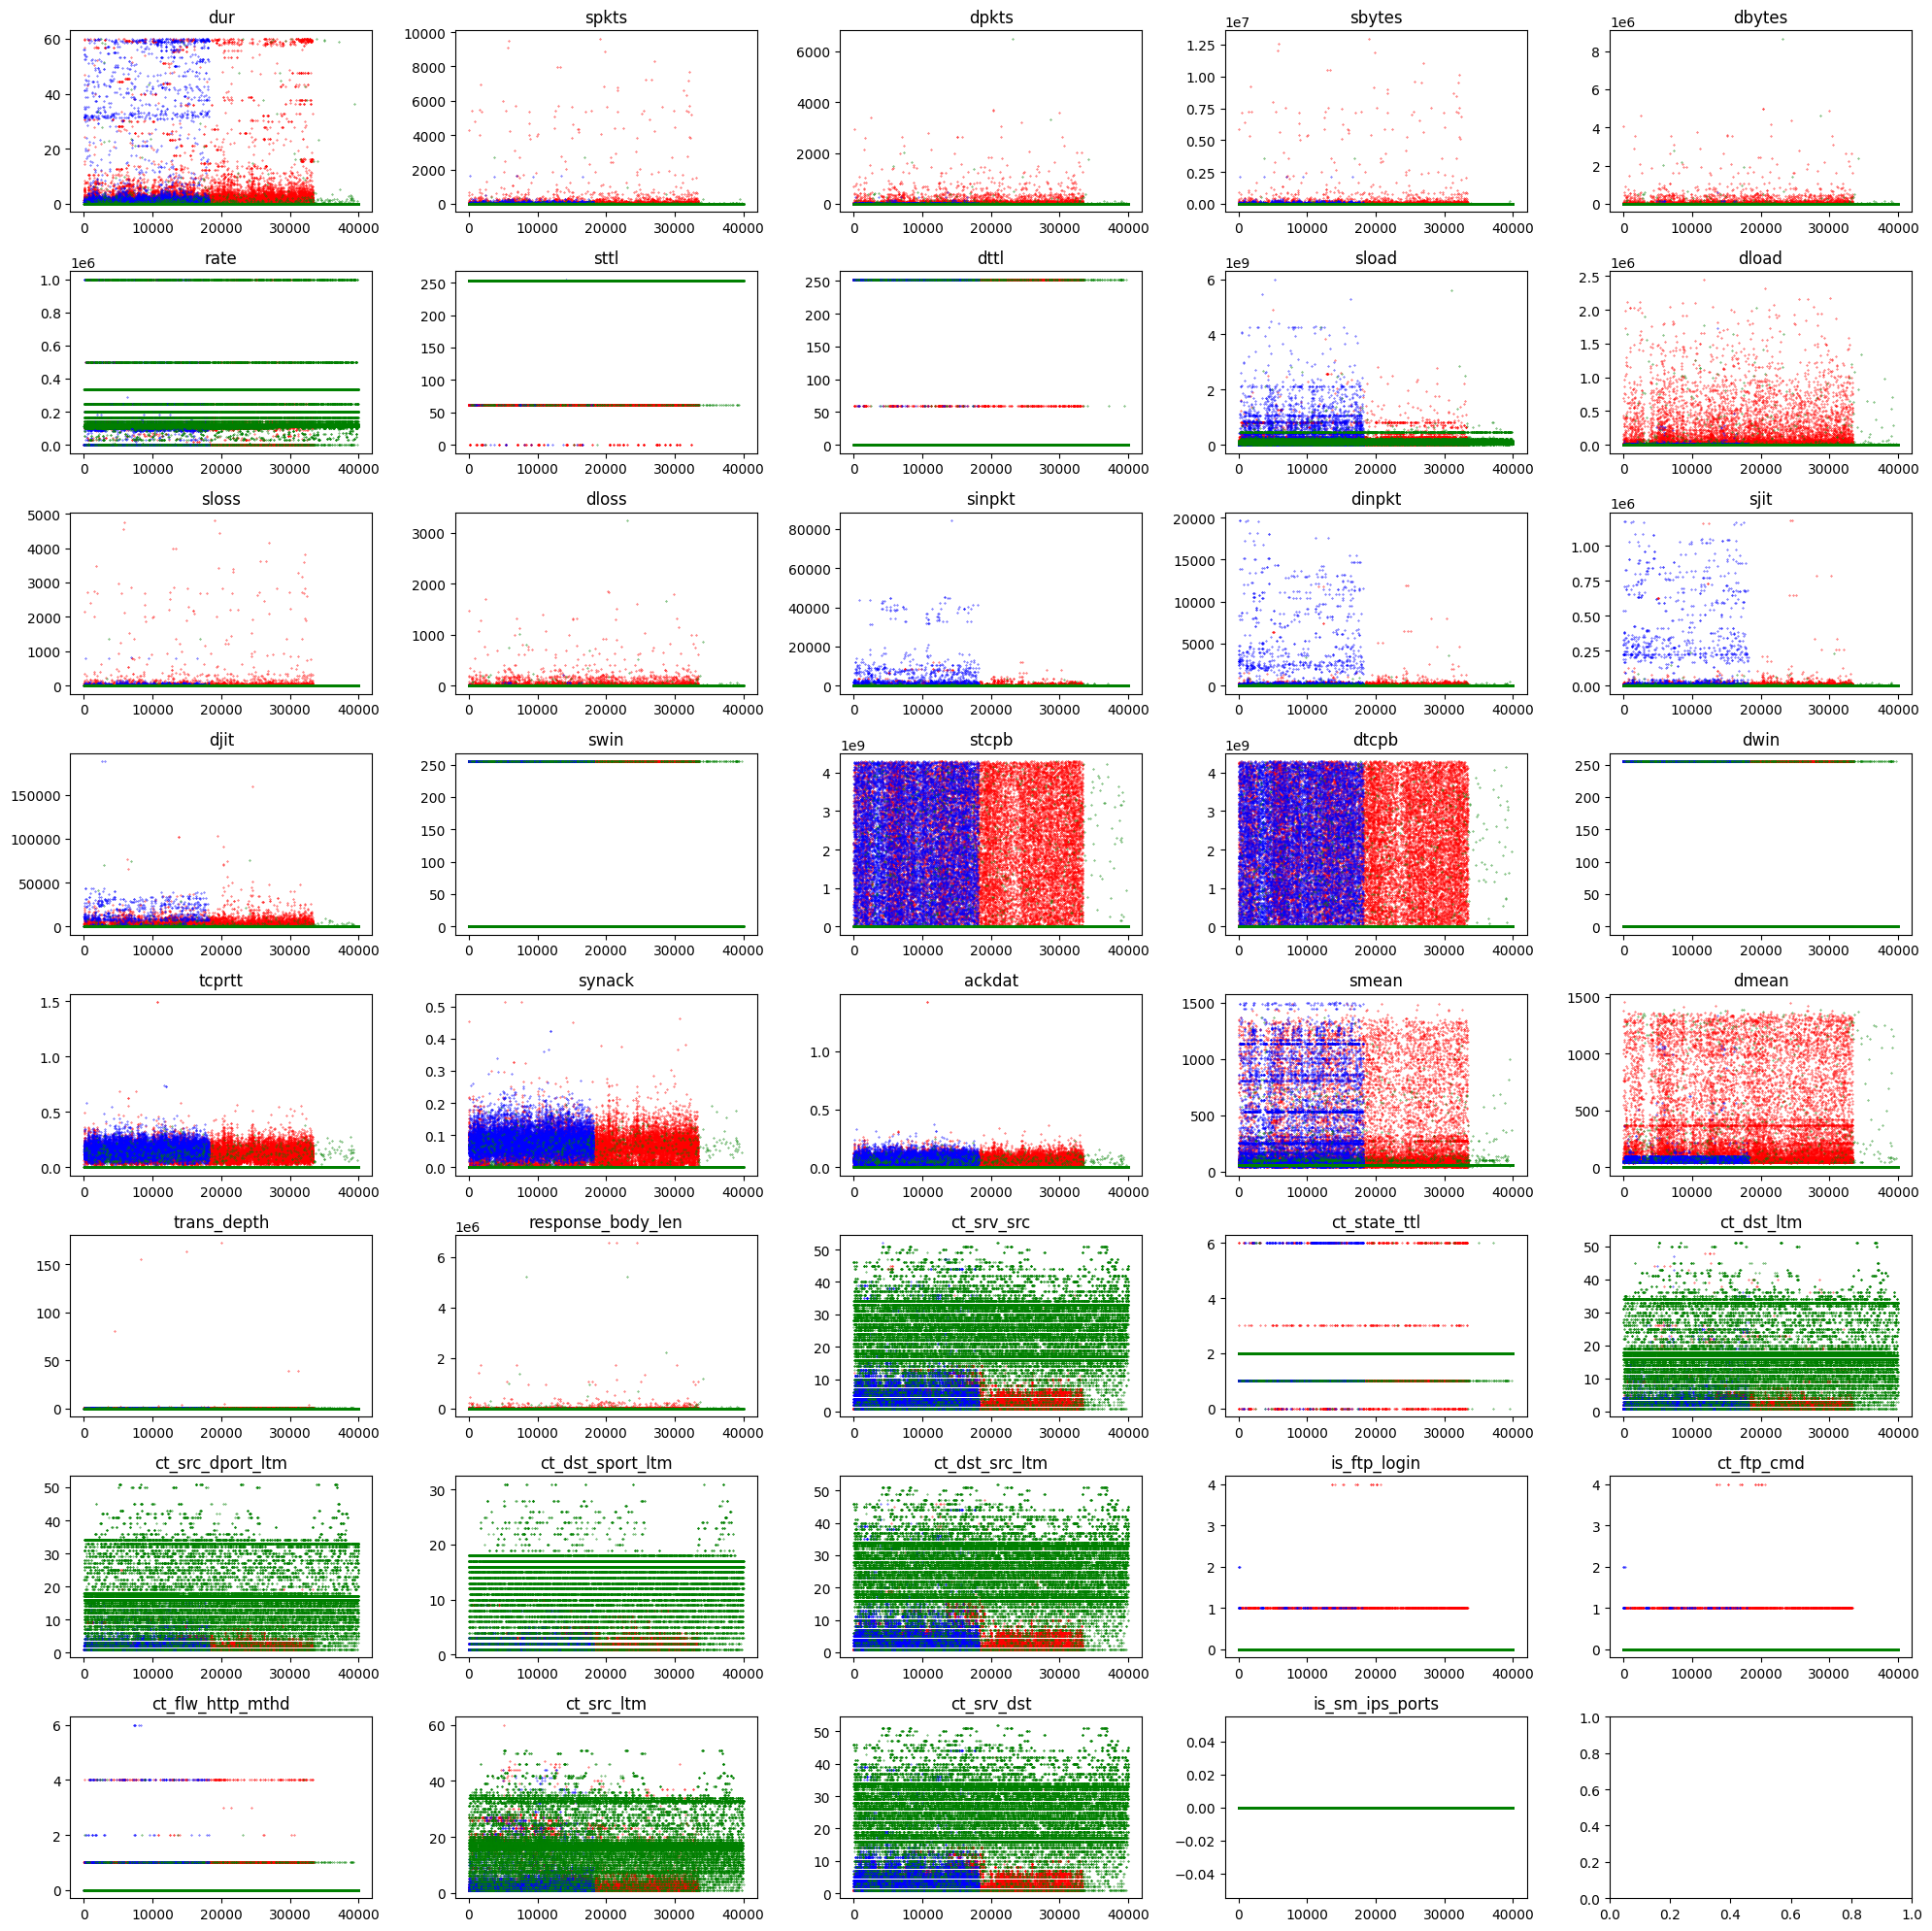

In [10]:
fig, axs = plt.subplots(8, 5, figsize=(20, 20))

axs = axs.flatten()

columns = np.concatenate((np.array([data.columns[1]]), np.array(data.columns[5:-1])))

attack_cat = np.unique(data['attack_cat'])[3:6]
colors = ["red", "blue", "green", "yellow"]

for i, column in enumerate(columns):
    for j in range(len(attack_cat)):
        y = data[data['attack_cat'] == attack_cat[j]][column].values
        axs[i].scatter(np.linspace(0, len(y), len(y)), y, color=colors[j], s=0.1)
    axs[i].set_title(column)
    
plt.tight_layout()

# Display the plot
plt.show()


>visualizing the distribution of train data last four features.

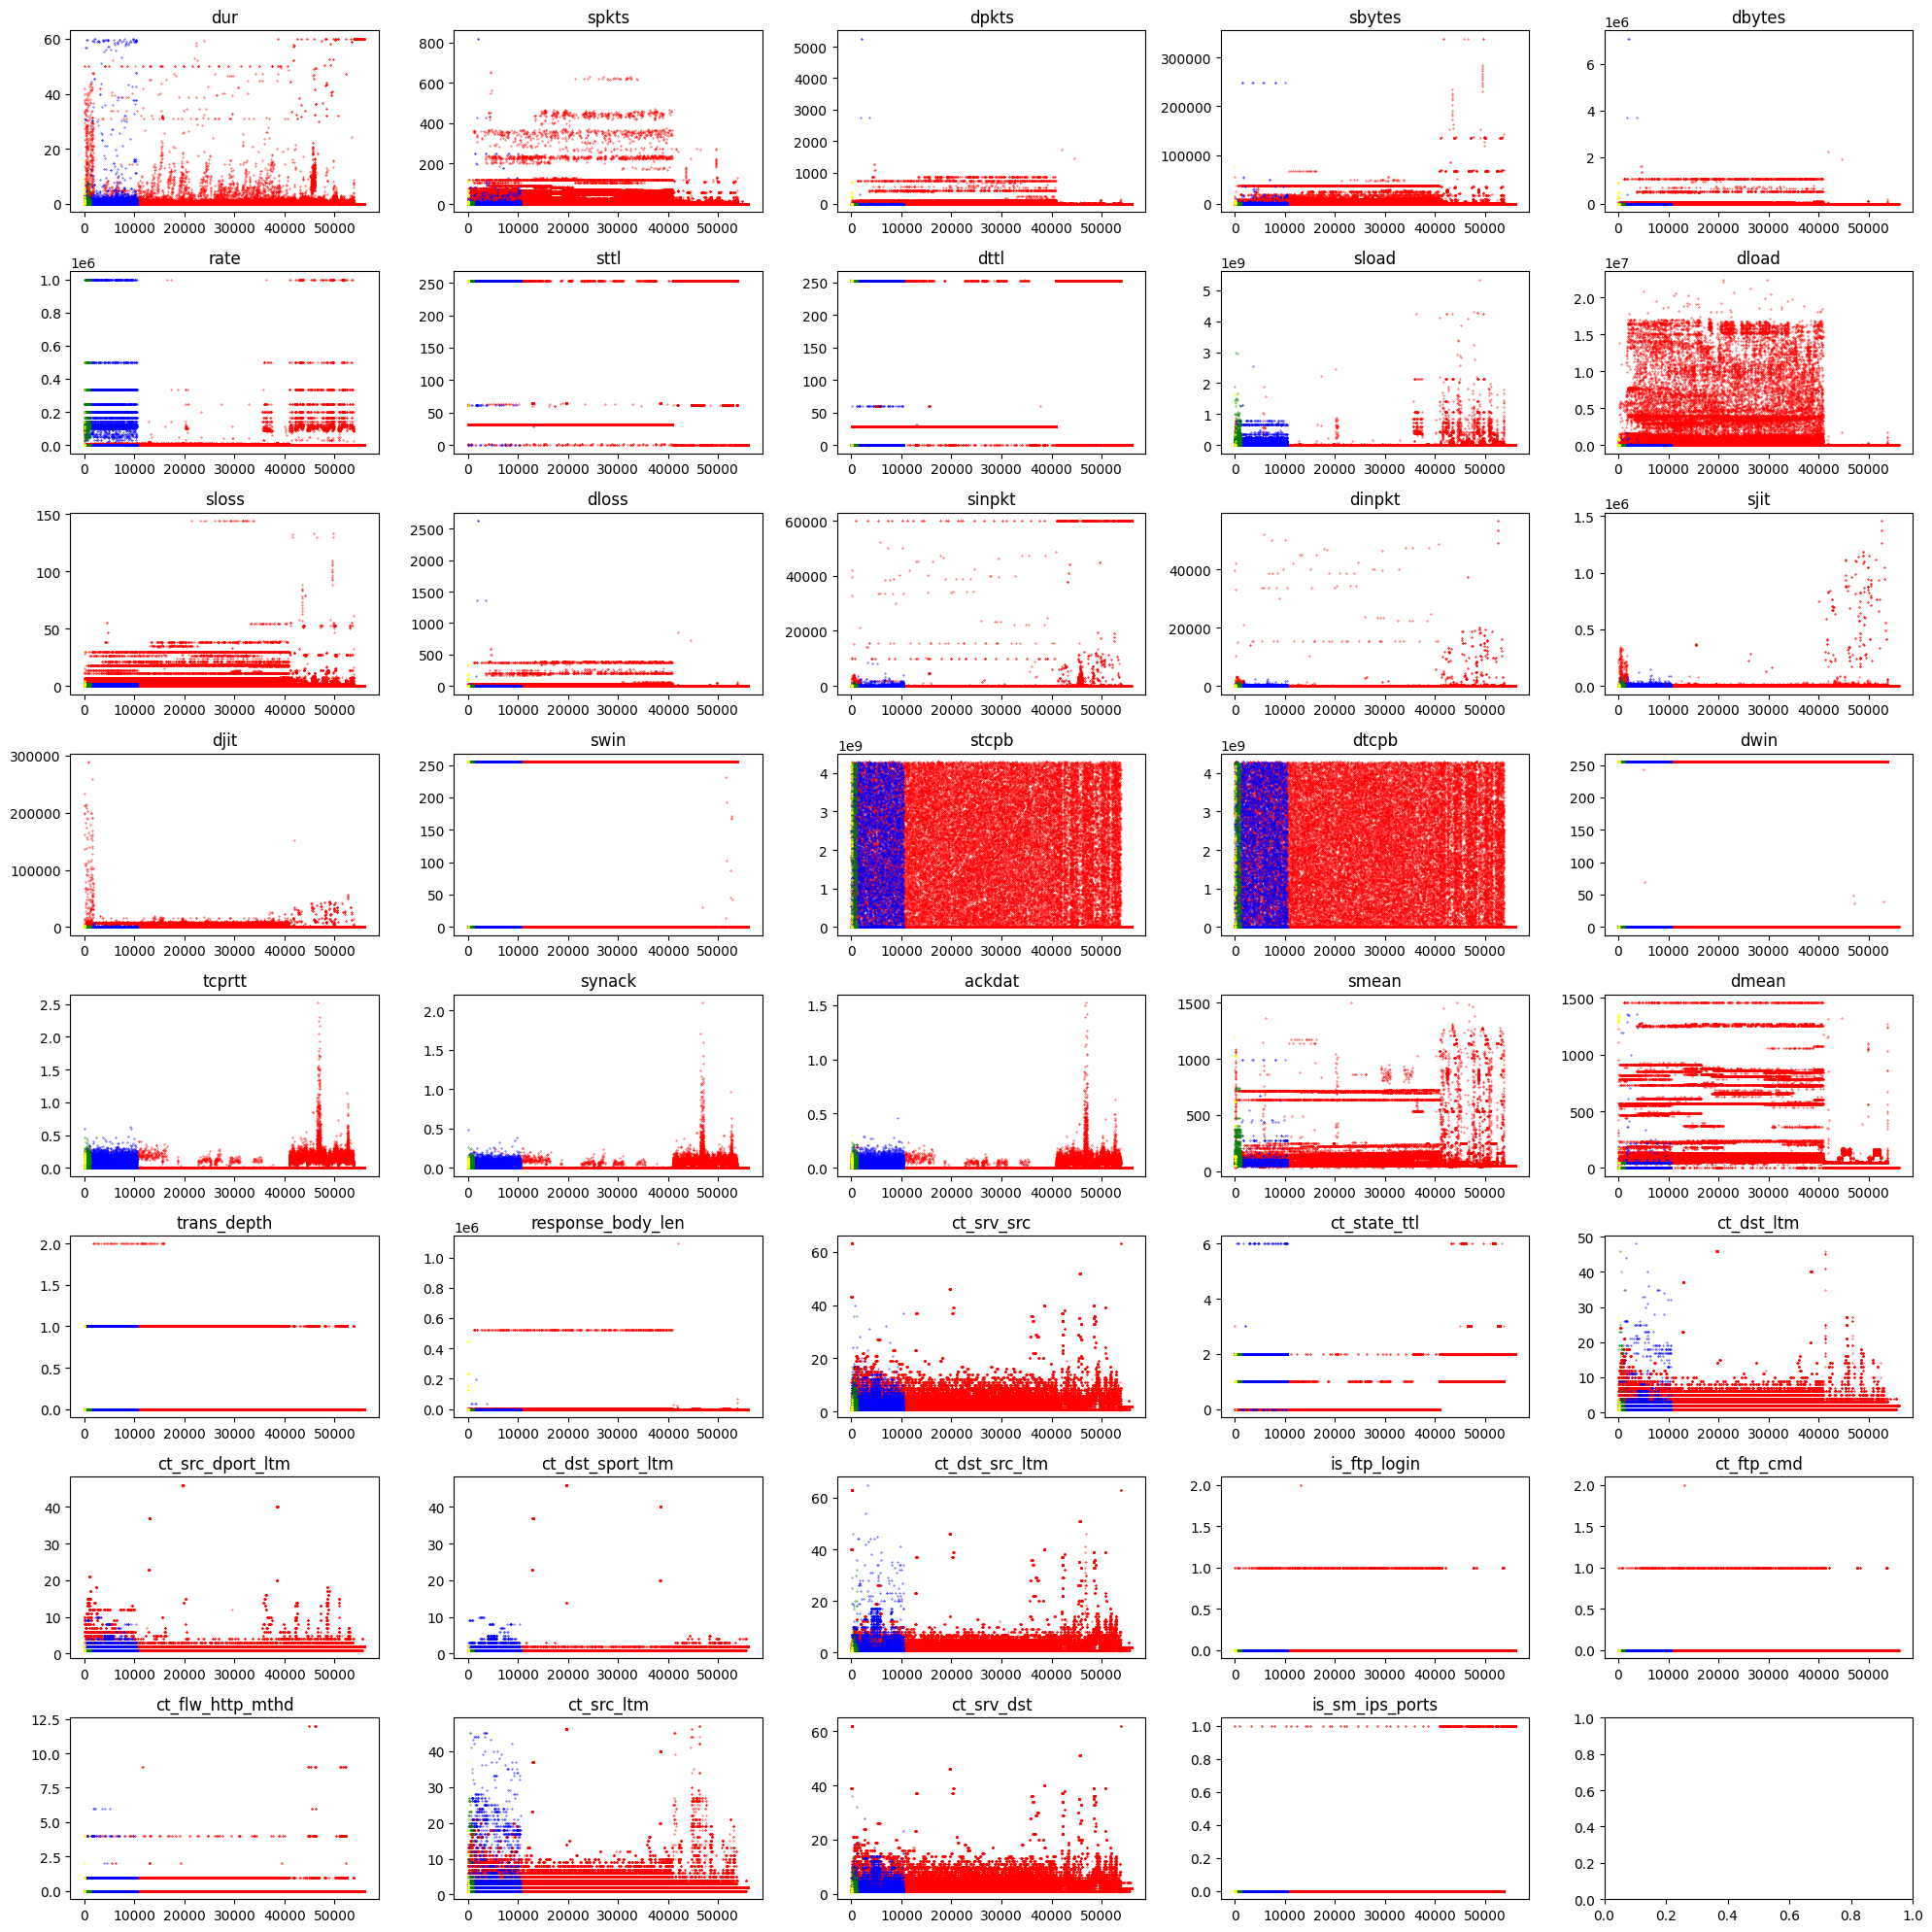

In [11]:
fig, axs = plt.subplots(8, 5, figsize=(20, 20))

axs = axs.flatten()

columns = np.concatenate((np.array([data.columns[1]]), np.array(data.columns[5:-1])))

attack_cat = np.unique(data['attack_cat'])[6:]
colors = ["red", "blue", "green", "yellow"]

for i, column in enumerate(columns):
    for j in range(len(attack_cat)):
        y = data[data['attack_cat'] == attack_cat[j]][column].values
        axs[i].scatter(np.linspace(0, len(y), len(y)), y, color=colors[j], s=0.1)
    axs[i].set_title(column)
    
plt.tight_layout()

# Display the plot
plt.show()


>Visualizing the attack_cat for train data

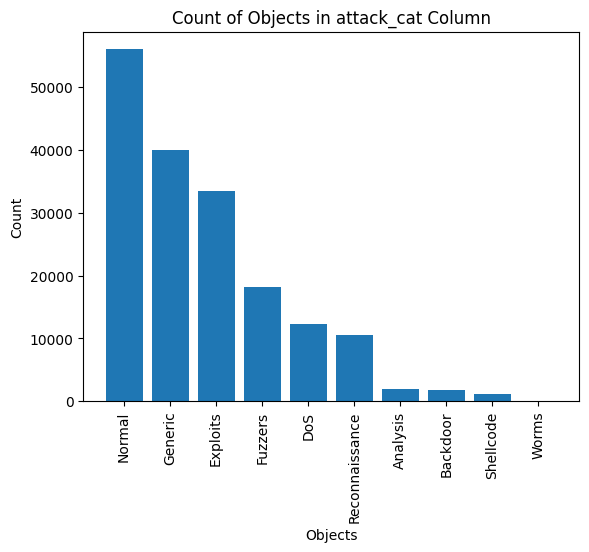

In [32]:
column_data = data['attack_cat']
value_counts = column_data.value_counts()

plt.bar(value_counts.index, value_counts.values)

# Set labels and title
plt.xlabel('Objects')
plt.ylabel('Count')
plt.title('Count of Objects in attack_cat Column')

# Rotate x-axis labels if needed
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

>Visualizing the attack_cat for test data

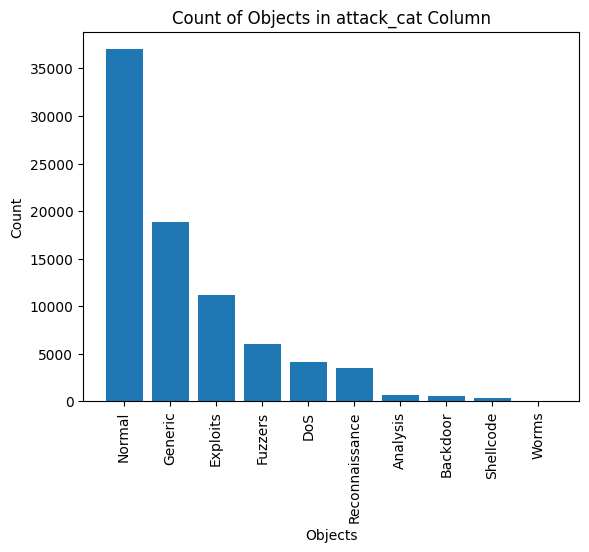

In [33]:
column_data = test_data['attack_cat']
value_counts = column_data.value_counts()

plt.bar(value_counts.index, value_counts.values)

# Set labels and title
plt.xlabel('Objects')
plt.ylabel('Count')
plt.title('Count of Objects in attack_cat Column')

# Rotate x-axis labels if needed
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

The last four categories are rare in this data set and we may drop them, but it wouldn't make a huge change.

Here we do the over sampling becuase in test data, we have more Normal attack_cat than train data.

In [34]:
# data = pd.concat([data, data[data["attack_cat"] == "Normal"]])

then seperating input (X) and output (y) data

In [26]:
X_train = data.iloc[:, :-1]
y_train = data["attack_cat"].values

In [27]:
X_test = test_data.iloc[:, :-1]
y_test = test_data["attack_cat"].values

these two functions are written to map output data from object to numbers. which the number is chosen by it's index in np.unique(y_train), array.

In [28]:
def convert_to_num(x, arr):
    for i in range(len(arr)):
        if (x == arr[i]):
            return i

In [29]:
def converter(array):
    map_list = np.unique(array)
    for i in range(len(array)):
        array[i] = convert_to_num(array[i], map_list)

calling the function to map

In [30]:
converter(y_train)
converter(y_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

Here we drop the column Proto, Service and State so that we can scale other columns to have the scaled data.

In [31]:
proto = X_train["proto"]
X_train = X_train.drop("proto", axis=1)

service = X_train["service"]
X_train = X_train.drop("service", axis=1)

state = X_train["state"]
X_train = X_train.drop("state", axis=1)

X_train = X_train.drop('id', axis=1)

In [32]:
proto_test = X_test["proto"]
X_test = X_test.drop("proto", axis=1)

service_test = X_test["service"]
X_test = X_test.drop("service", axis=1)

state_test = X_test["state"]
X_test = X_test.drop("state", axis=1)

X_test = X_test.drop('id', axis=1)

Scaling data

In [33]:
col_names = X_train.columns
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=col_names)
X_test = pd.DataFrame(scaler.transform(X_test), columns=col_names)

then again we add those columns that we dropped.

In [43]:
# X_train = X_train.reset_index(drop=True)
# X_test = X_test.reset_index(drop=True)

In [34]:
X_train = pd.DataFrame(pd.concat([X_train, proto, service, state], axis=1), 
                        columns= col_names.values.tolist() + ["proto", "service", "state"])
X_test = pd.DataFrame(pd.concat([X_test, proto_test, service_test, state_test], axis=1), 
                        columns= col_names.values.tolist() + ["proto", "service", "state"])

and after that, we use get_dummies function to one_hot map the object columns (once dropped and then added columns).

In [35]:
dummy_X_train = pd.get_dummies(X_train)
dummy_X_test = pd.get_dummies(X_test)
dummy_X_test = dummy_X_test.reindex(columns= dummy_X_train.columns, fill_value=0)

Here we can see the scaled and preprocessed data.

In [59]:
dummy_X_train

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,2.024634e-03,0.000520,0.000364,0.000018,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,0,0,0,1,0,0,0,0,0,0
1,1.083170e-02,0.001352,0.003463,0.000054,0.002867,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,0,0,0,1,0,0,0,0,0,0
2,2.705215e-02,0.000728,0.001458,0.000026,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,0,0,0,1,0,0,0,0,0,0
3,2.802737e-02,0.001144,0.001093,0.000046,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,0,0,0,1,0,0,0,0,0,0
4,7.490901e-03,0.000936,0.000547,0.000039,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,1.500000e-07,0.000104,0.000000,0.000007,0.000000,0.111111,0.996078,0.000000,8.461366e-03,0.000000,...,0,0,0,0,1,0,0,0,0,0
175337,8.429368e-03,0.000936,0.000729,0.000046,0.000024,0.000034,0.996078,0.992126,1.473996e-06,0.000219,...,0,0,0,1,0,0,0,0,0,0
175338,1.500000e-07,0.000104,0.000000,0.000007,0.000000,0.111111,0.996078,0.000000,8.461366e-03,0.000000,...,0,0,0,0,1,0,0,0,0,0
175339,1.500000e-07,0.000104,0.000000,0.000007,0.000000,0.111111,0.996078,0.000000,8.461366e-03,0.000000,...,0,0,0,0,1,0,0,0,0,0


After scaling, we do the dimention reduction using PCA.

In [36]:
pca = PCA(n_components=0.98)

pca_train = pca.fit_transform(dummy_X_train)
pca_test = pca.transform(dummy_X_test)

# Model selection

SVM:

In [172]:
ker = ['rbf', 'sigmoid']
svm_scores = np.array([])
for a in ker:
    svm = SVC(kernel=a)
    score = cross_val_score(svm, pca_train, y_train, cv=5)
    svm_scores = np.append(svm_scores, score.mean())
    print(a, " is done with mean score: ", score.mean())
print(svm_scores)

rbf  is done with mean score:  0.7570616428484193
sigmoid  is done with mean score:  0.662257851500584
[0.75706164 0.66225785]


In [20]:
accuracy_arr_train = np.array([])
accuracy_arr_test = np.array([])

In [21]:
svm = SVC(kernel='poly')
score = cross_val_score(svm, pca_train, y_train, cv=5)
print(score.mean())

0.7567821867693232


In [22]:
svm.fit(pca_train, y_train)
y_predict = svm.predict(pca_test)

acc = accuracy_score(y_test, y_predict)
accuracy_arr_test = np.append(accuracy_arr_test, acc)
acc

0.6996186173055434

In [23]:
print(confusion_matrix(y_test, y_predict))

[[    0     0     0   676     0     0     1     0     0     0]
 [    0     0     0   546    14     0     0    23     0     0]
 [    0     0   116  3602   229    20    14   108     0     0]
 [    8     0    63  9783   951     2    39   286     0     0]
 [    0     0     0  1358  4312     8   135   249     0     0]
 [    0     0    55   398   206 18161     2    49     0     0]
 [   55     0     7  1262 10950     1 22963  1762     0     0]
 [    0     0     4   800   417     7     2  2266     0     0]
 [    0     0     0     1   125     0     0   252     0     0]
 [    0     0     0    34     9     0     0     1     0     0]]


In [24]:
print(precision_recall_fscore_support(y_test, y_predict))

(array([0.        , 0.        , 0.47346939, 0.52995666, 0.25050834,
       0.99791197, 0.99166523, 0.45356285, 0.        , 0.        ]), array([0.        , 0.        , 0.02836879, 0.87881782, 0.7113164 ,
       0.96237613, 0.62062162, 0.64816934, 0.        , 0.        ]), array([0.        , 0.        , 0.05353023, 0.66119221, 0.37052632,
       0.97982196, 0.76344837, 0.53367876, 0.        , 0.        ]), array([  677,   583,  4089, 11132,  6062, 18871, 37000,  3496,   378,
          44], dtype=int64))


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
y_predict = svm.predict(pca_train)

acc = accuracy_score(y_train, y_predict)
accuracy_arr_train = np.append(accuracy_arr_train, acc)
acc

0.776726492948027

In [26]:
print(confusion_matrix(y_train, y_predict))

[[   83     0     6  1646     7     0   258     0     0     0]
 [    0     0     0  1581    54     0     4   107     0     0]
 [    1     0   298 11223   424    40    45   233     0     0]
 [    0     0   139 30379  2202    13   131   529     0     0]
 [    3     0     0  1866 14338    37   425  1515     0     0]
 [    0     0    57   627   152 39115     6    43     0     0]
 [   13     0     8   618  8852     0 45877   632     0     0]
 [    0     0    11  3398   951    20     9  6102     0     0]
 [    0     0     0     2   343     0     2   786     0     0]
 [    0     0     0   115    10     0     0     5     0     0]]


In [27]:
print(precision_recall_fscore_support(y_train, y_predict))

(array([0.83      , 0.        , 0.57418112, 0.59039938, 0.52456737,
       0.99719567, 0.98117929, 0.61314309, 0.        , 0.        ]), array([0.0415    , 0.        , 0.02429876, 0.90974156, 0.78849538,
       0.977875  , 0.81923214, 0.58164141, 0.        , 0.        ]), array([0.07904762, 0.        , 0.04662442, 0.71608052, 0.63000637,
       0.98744083, 0.89292214, 0.59697696, 0.        , 0.        ]), array([ 2000,  1746, 12264, 33393, 18184, 40000, 56000, 10491,  1133,
         130], dtype=int64))


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN:

In [171]:
n = [3, 5, 7]
knn_scores = np.array([])
for a in n:
    KNN = KNeighborsClassifier(n_neighbors= a)
    score = cross_val_score(KNN, pca_train, y_train, cv=5)
    knn_scores = np.append(knn_scores, score.mean())
    print("KNN with ", a, "neigbours is done.")
print(knn_scores)

KNN with  3 neigbours is done.
KNN with  5 neigbours is done.
KNN with  7 neigbours is done.
[0.71318154 0.72706873 0.73208182]


In [28]:
KNN = KNeighborsClassifier(n_neighbors= 7)
score = cross_val_score(KNN, pca_train, y_train, cv=5)
print(score.mean())

0.731642673886765


In [29]:
KNN.fit(pca_train, y_train)
y_predict = KNN.predict(pca_test)

acc = accuracy_score(y_test, y_predict)
accuracy_arr_test = np.append(accuracy_arr_test, acc)
acc

0.715201865617257

In [30]:
print(confusion_matrix(y_test, y_predict))

[[   24    71   284   297     0     0     1     0     0     0]
 [   23    39   257   231     9     0     6    18     0     0]
 [  397   641  1126  1612   142    17    52    91    10     1]
 [  392   610  1349  7620   495    10   203   424    27     2]
 [   91   143   539   689  3058     2  1362   174     4     0]
 [    1     3   101   383   106 18212    18    33    11     3]
 [  416     4   228  1249  7755     5 26431   873    38     1]
 [   47    78   115   495   329     4   133  2287     8     0]
 [    0     0     6    18    55     3    30   181    85     0]
 [    0     0     0    30     6     0     1     5     0     2]]


In [31]:
print(precision_recall_fscore_support(y_test, y_predict))

(array([0.01725377, 0.02454374, 0.28114856, 0.60361217, 0.25579256,
       0.99775379, 0.93604136, 0.5597161 , 0.46448087, 0.22222222]), array([0.03545052, 0.06689537, 0.27537295, 0.68451312, 0.50445398,
       0.96507869, 0.71435135, 0.6541762 , 0.22486772, 0.04545455]), array([0.02321083, 0.0359116 , 0.27823079, 0.64152214, 0.33945718,
       0.98114427, 0.81030703, 0.6032709 , 0.3030303 , 0.0754717 ]), array([  677,   583,  4089, 11132,  6062, 18871, 37000,  3496,   378,
          44], dtype=int64))


In [32]:
y_predict = KNN.predict(pca_train)

acc = accuracy_score(y_train, y_predict)
accuracy_arr_train = np.append(accuracy_arr_train, acc)
acc

0.8080711299696021

In [33]:
print(confusion_matrix(y_train, y_predict))

[[  372    44   702   759     1     0   122     0     0     0]
 [   51   128   709   700    40     0    24    93     1     0]
 [   73    46  5631  5955   241    22    89   176    31     0]
 [  106    64  6225 24846   967    21   399   720    41     4]
 [   21    11   755  1278 13073     7  2479   524    36     0]
 [    5     3   240   458    73 39168     6    37     5     5]
 [  101     4    60   588  3688     3 51308   238    10     0]
 [    9     9   934  1843   629     8   260  6793     6     0]
 [    0     0    14    52   212     3    56   442   354     0]
 [    0     0     4    89    11     1     0    10     0    15]]


In [34]:
print(precision_recall_fscore_support(y_train, y_predict))

(array([0.50406504, 0.41423948, 0.36866571, 0.67944651, 0.69041458,
       0.99834323, 0.93725225, 0.75202037, 0.73140496, 0.625     ]), array([0.186     , 0.07331042, 0.45914873, 0.74404815, 0.71892873,
       0.9792    , 0.91621429, 0.64750739, 0.31244484, 0.11538462]), array([0.27173119, 0.12457421, 0.40896216, 0.71028144, 0.7043832 ,
       0.98867896, 0.92661387, 0.6958615 , 0.43784787, 0.19480519]), array([ 2000,  1746, 12264, 33393, 18184, 40000, 56000, 10491,  1133,
         130], dtype=int64))


Random Forest:

In [20]:
est = [75, 100]
max_feature = [5, 7]
cri = ["gini", "entropy"]
rf_scores = np.array([])
for a in est:
    for b in max_feature:
        for c in cri:
            RFC = RandomForestClassifier(n_estimators = a, max_features = b, criterion = c)
            score = cross_val_score(RFC, pca_train, y_train, cv = 5)
            rf_scores = np.append(rf_scores, score.mean())
            print("n_estimator: ", a, " max_feature: ", b, " criterion: ", c, " is done by score: ", score.mean())
print(rf_scores)

n_estimator:  75  max_feature:  5  criterion:  gini  is done by score:  0.7540161758310149
n_estimator:  75  max_feature:  5  criterion:  entropy  is done by score:  0.7536055505858754
n_estimator:  75  max_feature:  7  criterion:  gini  is done by score:  0.7538336807454656
n_estimator:  75  max_feature:  7  criterion:  entropy  is done by score:  0.7544838367059861
n_estimator:  100  max_feature:  5  criterion:  gini  is done by score:  0.7537139101836756
n_estimator:  100  max_feature:  5  criterion:  entropy  is done by score:  0.7538165608842907
n_estimator:  100  max_feature:  7  criterion:  gini  is done by score:  0.7537424421472372
n_estimator:  100  max_feature:  7  criterion:  entropy  is done by score:  0.7546150087993355
[0.75401618 0.75360555 0.75383368 0.75448384 0.75371391 0.75381656
 0.75374244 0.75461501]


In [35]:
RFC = RandomForestClassifier(n_estimators = 75, max_features = 7, criterion = "entropy")
score = cross_val_score(RFC, pca_train, y_train, cv = 5)
print(score.mean())

0.7540960283473546


In [36]:
RFC.fit(pca_train, y_train)
y_predict = RFC.predict(pca_test)

acc = accuracy_score(y_test, y_predict)
accuracy_arr_test = np.append(accuracy_arr_test, acc)
acc

0.7273721031919546

In [37]:
print(confusion_matrix(y_test, y_predict))

[[   77   212     9   378     0     0     1     0     0     0]
 [   77   110    17   357    11     0     3     3     5     0]
 [  395  1439   337  1651   143    13    28    50    32     1]
 [  472  1428   333  8092   415    10   124   200    57     1]
 [  190   365    19   826  2940     4  1402   291    25     0]
 [    0     1    52   456    81 18241    11    15    13     1]
 [  504     0    47   852  7717     8 27187   614    69     2]
 [   43   177    11   400    87     4    38  2718    18     0]
 [    0     0     8    51    59     1    13    69   177     0]
 [    0     0     0    31     5     0     0     0     1     7]]


In [38]:
print(precision_recall_fscore_support(y_test, y_predict))

(array([0.04379977, 0.02947481, 0.40456182, 0.61799297, 0.25658928,
       0.99781194, 0.94376367, 0.68636364, 0.44584383, 0.58333333]), array([0.11373708, 0.18867925, 0.08241624, 0.7269134 , 0.48498845,
       0.96661544, 0.73478378, 0.77745995, 0.46825397, 0.15909091]), array([0.06324435, 0.05098494, 0.1369362 , 0.6680426 , 0.33561644,
       0.98196598, 0.82626468, 0.72907725, 0.45677419, 0.25      ]), array([  677,   583,  4089, 11132,  6062, 18871, 37000,  3496,   378,
          44], dtype=int64))


In [39]:
y_predict = RFC.predict(pca_train)

acc = accuracy_score(y_train, y_predict)
accuracy_arr_train = np.append(accuracy_arr_train, acc)
acc

0.9075002423848387

In [40]:
print(confusion_matrix(y_train, y_predict))

[[  601    54   368   972     5     0     0     0     0     0]
 [   39   467   368   863     8     0     0     1     0     0]
 [    0     0  5263  6980     4     4     0    11     1     1]
 [    0     2  2506 30831    14    11     0    23     2     4]
 [    6     9   366  1115 16569     2   111     6     0     0]
 [    0     0   204    99     1 39696     0     0     0     0]
 [    0     0     0     0   209     0 55790     0     1     0]
 [    0     0   506  1331     2     0     0  8652     0     0]
 [    0     0     0     0     1     1     0     0  1131     0]
 [    0     0     0     8     0     0     0     0     0   122]]


In [41]:
print(precision_recall_fscore_support(y_train, y_predict))

(array([0.93034056, 0.87781955, 0.54931636, 0.73060973, 0.98548742,
       0.99954676, 0.99801435, 0.99528356, 0.99647577, 0.96062992]), array([0.3005    , 0.2674685 , 0.4291422 , 0.92327733, 0.91118566,
       0.9924    , 0.99625   , 0.82470689, 0.99823477, 0.93846154]), array([0.4542706 , 0.41000878, 0.48184939, 0.81572124, 0.94688116,
       0.99596056, 0.99713139, 0.90200167, 0.9973545 , 0.94941634]), array([ 2000,  1746, 12264, 33393, 18184, 40000, 56000, 10491,  1133,
         130], dtype=int64))


MLP:

In [21]:
layers = [(30, 50), (60, 40), (50, 40, 30)]
# learning_rate = ['invscaling', 'adaptive']
# activation = ['tanh', 'relu']
mlp_scores = np.array([])
for l in layers:         
    mlp = MLPClassifier(hidden_layer_sizes= l, learning_rate= 'adaptive' , activation= 'relu')
    score = cross_val_score(mlp, pca_train, y_train, cv=5)
    mlp_scores = np.append(mlp_scores, score.mean())
    print("layer: ", l, "is done by score: ", np.mean(score))
print(mlp_scores)

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

layer:  (30, 50) is done by score:  0.7692949664521465


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

layer:  (60, 40) is done by score:  0.7719241549460399


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

layer:  (50, 40, 30) is done by score:  0.7771539432130545
[0.76929497 0.77192415 0.77715394]


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
mlp = MLPClassifier(hidden_layer_sizes= (60, 45, 35, 27), learning_rate= 'adaptive' , activation= 'relu')
score = cross_val_score(mlp, pca_train, y_train, cv=5)
print(score.mean())

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

0.7776216562916491


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
mlp.fit(pca_train, y_train)
y_predict = mlp.predict(pca_test)

acc = accuracy_score(y_test, y_predict)
accuracy_arr_test = np.append(accuracy_arr_test, acc)
acc

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7365908759656027

In [44]:
print(confusion_matrix(y_test, y_predict))

[[    6    55   107   475    19     1     8     6     0     0]
 [    6    73   111   347    25     0     5    12     4     0]
 [   22   473   455  2913    83    40    18    44    41     0]
 [   38   478   554  9374   231    20    63   321    52     1]
 [   29   169   231  1239  3400     3   700   112   179     0]
 [    0     7    44   454    60 17737    19   538    11     1]
 [  437    23    79  1531  8203     9 26484   123   111     0]
 [    3    56    10   497    28     4     4  2882    12     0]
 [    1     1     9    64    57     0     3    15   228     0]
 [    0     0     1    32     1     1     1     0     2     6]]


In [45]:
print(precision_recall_fscore_support(y_test, y_predict))

(array([0.01107011, 0.05468165, 0.28419738, 0.55382252, 0.28082927,
       0.99562167, 0.96993225, 0.71107821, 0.35625   , 0.75      ]), array([0.00886263, 0.12521441, 0.11127415, 0.8420769 , 0.560871  ,
       0.9399078 , 0.71578378, 0.82437071, 0.6031746 , 0.13636364]), array([0.00984413, 0.07612096, 0.1599297 , 0.66818733, 0.37426386,
       0.96696287, 0.82369956, 0.76354484, 0.44793713, 0.23076923]), array([  677,   583,  4089, 11132,  6062, 18871, 37000,  3496,   378,
          44], dtype=int64))


In [46]:
y_predict = mlp.predict(pca_train)

acc = accuracy_score(y_train, y_predict)
accuracy_arr_train = np.append(accuracy_arr_train, acc)
acc

0.8279295772238096

In [47]:
print(confusion_matrix(y_train, y_predict))

[[  258    48   120  1380     1     0   193     0     0     0]
 [    2   243   131  1329    10     1     3    15    12     0]
 [    6    38  1786 10084   114    38    36    86    75     1]
 [   21    47  1209 30415   477    47   158   917   101     1]
 [   14     2   160  1685 14120    10  2033    88    72     0]
 [    0     6    40   622    47 39260    10     6     7     2]
 [   78     2    27   671  4931     3 50195    68    25     0]
 [    2     5   237  1969    27     9    23  8214     5     0]
 [    0     2    39   167   205     0    15    50   655     0]
 [    0     1     2    85     7     2     3     2     4    24]]


In [48]:
print(precision_recall_fscore_support(y_train, y_predict))

(array([0.67716535, 0.61675127, 0.4761397 , 0.62831822, 0.70815989,
       0.99720599, 0.9530274 , 0.86957442, 0.68514644, 0.85714286]), array([0.129     , 0.13917526, 0.14562948, 0.91081963, 0.77650682,
       0.9815    , 0.89633929, 0.78295682, 0.57811121, 0.18461538]), array([0.21671567, 0.2271028 , 0.2230409 , 0.74364303, 0.74076017,
       0.98929066, 0.92381452, 0.82399559, 0.6270943 , 0.30379747]), array([ 2000,  1746, 12264, 33393, 18184, 40000, 56000, 10491,  1133,
         130], dtype=int64))


ADAboost:

In [50]:
adaboost = AdaBoostClassifier()
score = cross_val_score(mlp, pca_train, y_train, cv=5)
print(score.mean())

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

0.7786881420035352


In [51]:
adaboost.fit(pca_train, y_train)
y_predict = adaboost.predict(pca_test)

acc = accuracy_score(y_test, y_predict)
accuracy_arr_test = np.append(accuracy_arr_test, acc)
acc

0.6014307924014963

In [52]:
print(confusion_matrix(y_test, y_predict))

[[    4     0    14   601    57     0     1     0     0     0]
 [    7     0    17   513    40     0     6     0     0     0]
 [   67     0    41  3421   486     6    68     0     0     0]
 [   96     0    66  8127  2699     0   144     0     0     0]
 [   12     0   123  1529  4396     0     2     0     0     0]
 [    4     0    15   326   360 18141    25     0     0     0]
 [    0     0   109  3459 14624     0 18808     0     0     0]
 [   17     0     2   802  2665     5     5     0     0     0]
 [    0     0     0     0   378     0     0     0     0     0]
 [    0     0     0    34    10     0     0     0     0     0]]


In [53]:
print(precision_recall_fscore_support(y_test, y_predict))

(array([0.01932367, 0.        , 0.10594315, 0.43201148, 0.17095081,
       0.99939401, 0.98683037, 0.        , 0.        , 0.        ]), array([0.00590842, 0.        , 0.0100269 , 0.73005749, 0.72517321,
       0.96131631, 0.50832432, 0.        , 0.        , 0.        ]), array([0.00904977, 0.        , 0.01831993, 0.54281325, 0.2766781 ,
       0.97998541, 0.67100733, 0.        , 0.        , 0.        ]), array([  677,   583,  4089, 11132,  6062, 18871, 37000,  3496,   378,
          44], dtype=int64))


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
y_predict = adaboost.predict(pca_train)

acc = accuracy_score(y_train, y_predict)
accuracy_arr_train = np.append(accuracy_arr_train, acc)
acc

0.7042391682492971

In [55]:
print(confusion_matrix(y_train, y_predict))

[[   14     0     1  1985     0     0     0     0     0     0]
 [   33     0     7  1493   184     0    29     0     0     0]
 [  176     0    62 11012   828    14   172     0     0     0]
 [  309     0   145 28398  4123    13   405     0     0     0]
 [   35     0   141  2469 15295    81   163     0     0     0]
 [    8     0    22   633   222 39098    17     0     0     0]
 [    0     0   121  4355 10909     0 40615     0     0     0]
 [   46     0     6  3431  6982     6    20     0     0     0]
 [    0     0     0     0  1133     0     0     0     0     0]
 [    0     0     0   114    16     0     0     0     0     0]]


In [56]:
print(precision_recall_fscore_support(y_train, y_predict))

(array([0.02254428, 0.        , 0.12277228, 0.52696233, 0.38534213,
       0.99709273, 0.98054127, 0.        , 0.        , 0.        ]), array([0.007     , 0.        , 0.00505545, 0.85041775, 0.84112407,
       0.97745   , 0.72526786, 0.        , 0.        , 0.        ]), array([0.01068295, 0.        , 0.00971102, 0.65071091, 0.52854378,
       0.98717366, 0.8338038 , 0.        , 0.        , 0.        ]), array([ 2000,  1746, 12264, 33393, 18184, 40000, 56000, 10491,  1133,
         130], dtype=int64))


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Plotting the results.

In [57]:
algorithms = ["SVM", "KNN", "RandomForest", "MLP", "ADAboost"]

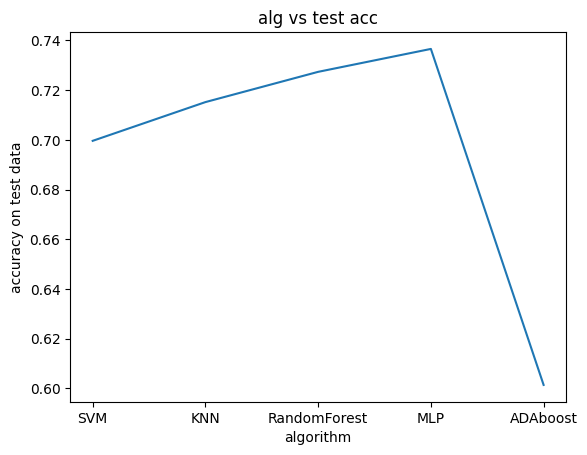

In [58]:
plt.plot(algorithms, accuracy_arr_test)
plt.xlabel('algorithm')
plt.ylabel('accuracy on test data')
plt.title('alg vs test acc')
plt.show()

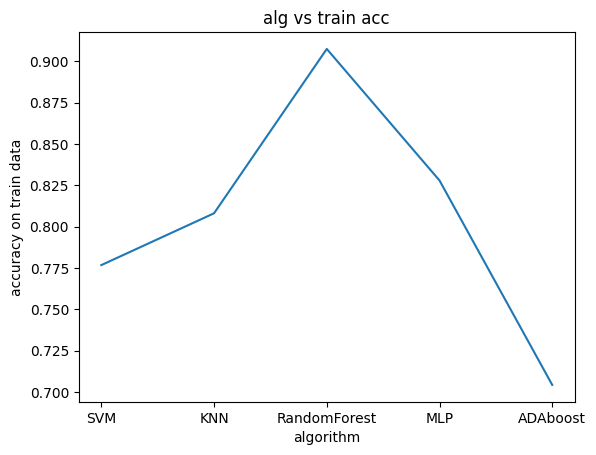

In [60]:
plt.plot(algorithms, accuracy_arr_train)
plt.xlabel('algorithm')
plt.ylabel('accuracy on train data')
plt.title('alg vs train acc')
plt.show()

So MLP model was the best model. Let's try it with a different hidden layers.

In [61]:
mlp = MLPClassifier(hidden_layer_sizes= (60, 45, 35, 27, 20, 15), learning_rate= 'adaptive' , activation= 'relu')
score = cross_val_score(mlp, pca_train, y_train, cv=5)
print(score.mean())

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

0.77828888430068


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [62]:
mlp.fit(pca_train, y_train)
y_predict = mlp.predict(pca_test)

acc = accuracy_score(y_test, y_predict)
accuracy_arr_test = np.append(accuracy_arr_test, acc)
acc

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7492226594762669

In [63]:
print(confusion_matrix(y_test, y_predict))

[[    0    39    31   602     0     2     3     0     0     0]
 [    0    33    31   509     3     0     0     3     4     0]
 [  283   346   518  2758    69    18     8    32    57     0]
 [  261   323   485  9396   222    24    83   234   101     3]
 [   34    58   115  1527  3318     0   592   149   269     0]
 [    0     3    74   503    77 18181     1     9    14     9]
 [  254     5   137  1023  8037     5 27118   273   147     1]
 [   36    43    35   483    19     3     4  2853    20     0]
 [    0     0     2    47    35     0     5    28   261     0]
 [    0     0     2    32     2     0     0     0     1     7]]


In [64]:
print(precision_recall_fscore_support(y_test, y_predict))

(array([0.        , 0.03882353, 0.36223776, 0.55663507, 0.28161602,
       0.99714803, 0.97497663, 0.79670483, 0.298627  , 0.35      ]), array([0.        , 0.05660377, 0.12668134, 0.84405318, 0.54734411,
       0.96343596, 0.73291892, 0.81607551, 0.69047619, 0.15909091]), array([0.        , 0.04605722, 0.18771517, 0.67085535, 0.37188971,
       0.98000216, 0.83679452, 0.80627384, 0.41693291, 0.21875   ]), array([  677,   583,  4089, 11132,  6062, 18871, 37000,  3496,   378,
          44], dtype=int64))


In [65]:
y_predict = mlp.predict(pca_train)

acc = accuracy_score(y_train, y_predict)
accuracy_arr_train = np.append(accuracy_arr_train, acc)
acc

0.8285113008366555

In [66]:
print(confusion_matrix(y_train, y_predict))

[[  202     8   201  1271     1     0   317     0     0     0]
 [   35   209   214  1234    13     0     3    17    19     2]
 [    1    19  2114  9742   121    35    56    76   100     0]
 [    8    18  1634 29892   481    48   343   798   163     8]
 [    5     2   248  1567 13955     1  2134   165   104     3]
 [    0     1    65   645    45 39202    10     7    12    13]
 [    7     2    41   437  4571     3 50794   111    34     0]
 [    0     5   345  1969    33     6    16  8111     6     0]
 [    0     0     8   131   150     1     9    64   770     0]
 [    0     0     5    88     6     0     0     3     5    23]]


In [67]:
print(precision_recall_fscore_support(y_train, y_predict))

(array([0.78294574, 0.79166667, 0.43364103, 0.63632493, 0.72022089,
       0.9976079 , 0.94620171, 0.86730111, 0.63478978, 0.46938776]), array([0.101     , 0.11970218, 0.17237443, 0.89515767, 0.76743291,
       0.98005   , 0.90703571, 0.77313888, 0.67961165, 0.17692308]), array([0.1789194 , 0.2079602 , 0.24668884, 0.7438689 , 0.74307774,
       0.98875101, 0.92620485, 0.81751751, 0.65643649, 0.25698324]), array([ 2000,  1746, 12264, 33393, 18184, 40000, 56000, 10491,  1133,
         130], dtype=int64))


# implementing an stacking method

Then again we use PCA to reduce our featurs once again

In [19]:
pca = PCA(n_components=0.98)

pca_train = pca.fit_transform(pca_train)
pca_test = pca.transform(pca_test)

first using KNN to add a new feature to pca_train and pca_test

In [20]:
KNN = KNeighborsClassifier(n_neighbors= 7)
score = cross_val_score(KNN, pca_train, y_train, cv=5)
print(score.mean())

0.7340665172324664


In [21]:
KNN.fit(pca_train, y_train)
y_predict = KNN.predict(pca_test)

pca_test = np.concatenate((pca_test, y_predict.reshape(-1, 1)), axis=1)

print(accuracy_score(y_test, y_predict))

0.7114123305640577


In [22]:
y_predict = KNN.predict(pca_train)

pca_train = np.concatenate((pca_train, y_predict.reshape(-1, 1)), axis=1)

print(accuracy_score(y_train, y_predict))

0.8074437809753566


Now we use new data to train a Random Forest

In [23]:
RFC = RandomForestClassifier(n_estimators = 80, max_features = 7, criterion = "entropy")
score = cross_val_score(RFC, pca_train, y_train, cv = 5)
print(score.mean())

0.7660898353843465


In [24]:
RFC.fit(pca_train, y_train)
y_predict = RFC.predict(pca_test)

pca_test = np.concatenate((pca_test, y_predict.reshape(-1, 1)), axis=1)

print(accuracy_score(y_test, y_predict))

0.7276757518340378


In [25]:
y_predict = RFC.predict(pca_train)

pca_train = np.concatenate((pca_train, y_predict.reshape(-1, 1)), axis=1)

print(accuracy_score(y_train, y_predict))

0.9075002423848387


and then, MLP:

In [30]:
mlp = MLPClassifier(hidden_layer_sizes= (60, 45, 35, 27, 20, 15, 25), learning_rate= 'adaptive' , activation= 'relu')
score = cross_val_score(mlp, pca_train, y_train, cv=5)
print(score.mean())

0.9019453302969277


In [31]:
mlp.fit(pca_train, y_train)
y_predict = mlp.predict(pca_test)

print(accuracy_score(y_test, y_predict))

0.728489530194821


In [32]:
y_predict = mlp.predict(pca_train)

print(accuracy_score(y_train, y_predict))

0.9069983631894423


now what if we use KNN for last one?

In [33]:
KNN = KNeighborsClassifier(n_neighbors= 7)
score = cross_val_score(KNN, pca_train, y_train, cv=5)
print(score.mean())

0.884105819567891


In [34]:
KNN.fit(pca_train, y_train)
y_predict = KNN.predict(pca_test)

print(accuracy_score(y_test, y_predict))

0.7242141573142885


In [35]:
y_predict = KNN.predict(pca_train)

print(accuracy_score(y_train, y_predict))

0.899093765861949


Then again, we train the MLP model with different layers to check for better results

In [37]:
mlp = MLPClassifier(hidden_layer_sizes= (50, 30, 20, 10), learning_rate= 'adaptive' , activation= 'relu')
score = cross_val_score(mlp, pca_train, y_train, cv=5)
print(score.mean())

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

0.7744677181135609


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
mlp.fit(pca_train, y_train)
y_predict = mlp.predict(pca_test)

print(accuracy_score(y_test, y_predict))

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.76629985910703


In [39]:
print(confusion_matrix(y_test, y_predict))

[[    0     0    11   664     0     0     2     0     0     0]
 [    0    24    17   533     1     0     1     1     6     0]
 [    0    14   301  3589    64    13    26    37    45     0]
 [   12    11   412 10161   138    28    95   198    77     0]
 [    0    31    28  1873  2413    16  1188   208   304     1]
 [    0     4    97   447    39 18253     6    13    10     2]
 [  396     2    17  1231  5827    12 28894   471   150     0]
 [    0     2     8   589    31     1    16  2817    32     0]
 [    0     1     6    48    45     4     3    48   223     0]
 [    0     0     1    36     0     0     1     0     1     5]]


In [40]:
precision_recall_fscore_support(y_test, y_predict)

(array([0.        , 0.26966292, 0.33518931, 0.5300193 , 0.2819584 ,
        0.99596224, 0.95574226, 0.74268389, 0.2629717 , 0.625     ]),
 array([0.        , 0.04116638, 0.07361213, 0.91277398, 0.39805345,
        0.96725134, 0.78091892, 0.80577803, 0.58994709, 0.11363636]),
 array([0.        , 0.07142857, 0.12071386, 0.67062667, 0.33009576,
        0.98139685, 0.85953118, 0.77294553, 0.36378467, 0.19230769]),
 array([  677,   583,  4089, 11132,  6062, 18871, 37000,  3496,   378,
           44], dtype=int64))

In [41]:
y_predict = mlp.predict(pca_train)

print(accuracy_score(y_train, y_predict))

0.8213595223022567


In [42]:
print(confusion_matrix(y_train, y_predict))

[[  203     0     9  1523     1     0   264     0     0     0]
 [    0   142    22  1513    22     1     8    20    18     0]
 [    1    26   762 11119   114    24    52    85    81     0]
 [   10    24   307 31572   367    68   285   629   127     4]
 [   13     0    16  2025 11623    12  4102   265   128     0]
 [    0     2    90   634    30 39206    12    16     9     1]
 [   70     0     9   645  3145     4 51909   171    47     0]
 [    0     4    25  2408    39     3   106  7900     6     0]
 [    0     0    14   128   129    10    18   153   681     0]
 [    0     0     1    96     9     0     1     2     1    20]]


In [43]:
precision_recall_fscore_support(y_train, y_predict)

(array([0.68350168, 0.71717172, 0.60717131, 0.61111434, 0.7508883 ,
        0.99689788, 0.91458322, 0.85488583, 0.62021858, 0.8       ]),
 array([0.1015    , 0.08132875, 0.06213307, 0.94546761, 0.6391883 ,
        0.98015   , 0.92694643, 0.7530264 , 0.60105914, 0.15384615]),
 array([0.17675229, 0.14609053, 0.11273023, 0.74238149, 0.69055046,
        0.98845301, 0.92072333, 0.80072978, 0.61048857, 0.25806452]),
 array([ 2000,  1746, 12264, 33393, 18184, 40000, 56000, 10491,  1133,
          130], dtype=int64))

In [12]:
algorithms = ["SVM", "KNN", "RandomForest", "MLP", "ADAboost", "stacking MLP", "stacking KNN", "MLP'"]

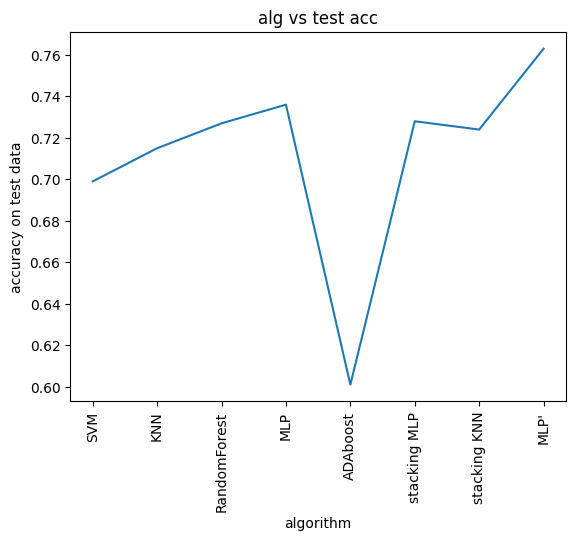

In [14]:
plt.plot(algorithms, accuracy_arr_test)
plt.xlabel('algorithm')
plt.ylabel('accuracy on test data')
plt.title('alg vs test acc')
plt.xticks(rotation='vertical')
plt.show()

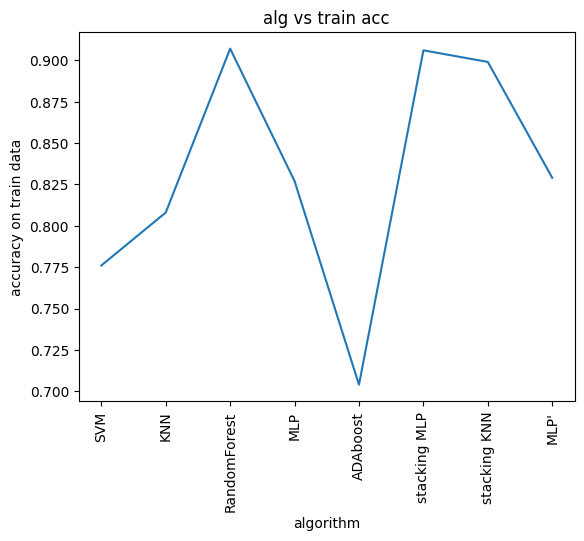

In [15]:
plt.plot(algorithms, accuracy_arr_train)
plt.xlabel('algorithm')
plt.ylabel('accuracy on train data')
plt.title('alg vs train acc')
plt.xticks(rotation='vertical')
plt.show()

As we can see, the MLP' is the best classifier for this data. We may change the layers again and get some better results.